In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
data=pd.read_csv(r"C:\Users\rk186\OneDrive\Documents\placement-1.csv")
data.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [3]:
data.isnull().sum()

cgpa       0
package    0
dtype: int64

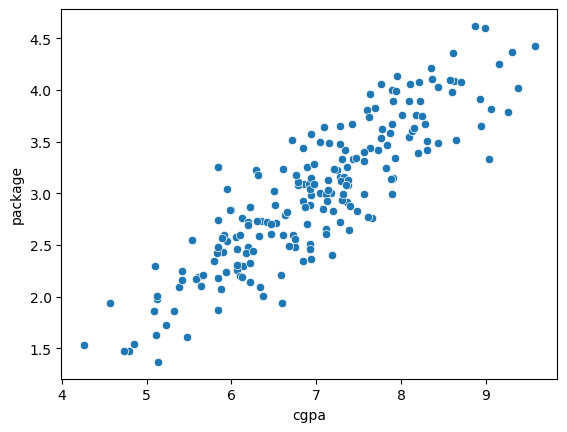

In [4]:
sns.scatterplot(data,x=data["cgpa"],y=data["package"])
plt.show()

In [5]:
x=data.iloc[:,:-1]
y=data["package"]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)


In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(80.7559707660133, 76.42637031854024)

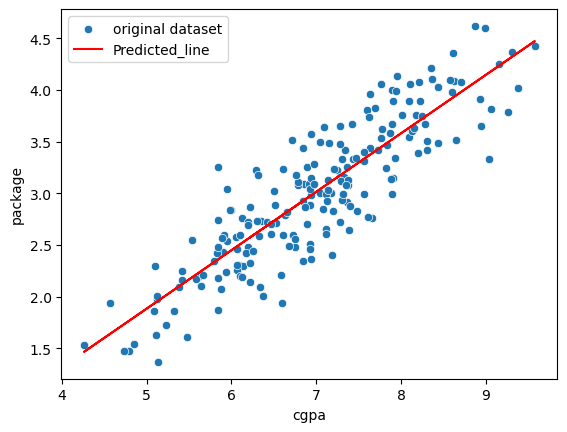

In [8]:
sns.scatterplot(data,x=data["cgpa"],y=data["package"],label="original dataset")
plt.plot(data["cgpa"],lr.predict(x),c="red",label="Predicted_line")
plt.legend()
plt.show()

In [9]:
lr.predict([[5.12]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.95308351])

In [10]:
joblib.dump(lr,"Linear Regression")

['Linear Regression']

In [11]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
model=joblib.load("Linear Regression")
def predection(cgpa):
    cgpa=float(cgpa)
    prediction_placement=model.predict([[cgpa]])
    return prediction_placement
def main():
    st.title("Placement Prediction")
    st.sidebar.title("User input")
    age=st.sidebar.slider("Age",18,25,18)
    name=st.sidebar.text_input("Enter your name: ")
    sex=st.sidebar.radio("Enter your gender: ",["Male","Female","Other"])
    Phone_no=st.sidebar.number_input("Enter your phone number: ",step=1)
    degree = st.sidebar.selectbox("Choose your degree", ["B.tech", "Bsc", "Other"])  
    cgpa=st.sidebar.text_input("Enter your sugested cgpa: ",0,10)
    st.subheader("Confirmation")
    st.write("Age=",age)
    st.write("Your Name :",name)
    st.write("Phone_number :",Phone_no)
    st.write("Degree :",degree)
    st.write("cgpa:",cgpa)
    st.write("Sex:",sex)
    if st.button('click me!'):
        prediction_=predection(cgpa)
        st.write(f"Sugested pakage for {name} with persuing {degree}, is likey to get --> {prediction_} crPA,congratulations")
main()

Overwriting app.py


In [12]:
! streamlit run app.py

^C
